In [16]:
#Load and summarize 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy import mean
from numpy import std
from numpy import absolute
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score


# load dataset
dataframe = read_csv(r"C:\Users\semil\Downloads\Volumetric_features.csv", header=None, skiprows = 1)
dataframe.drop(dataframe.columns[0],axis=1,inplace=True)
dataframe.drop(dataframe.columns[-1],axis=1,inplace=True)

dataframe = dataframe.astype(float)

# summarize shape
print(dataframe.shape)

# summarize first few lines
print(dataframe.head())

(4226, 139)
       1       2        3        4       5       6       7       8       9    \
0  22916.9   982.7  15196.7  55796.4  6855.5  2956.4  4240.7  2223.9  2034.4   
1  22953.2   984.5  15289.7  55778.6  6835.1  3064.2  4498.6  2354.1  1927.1   
2  23320.4  1062.1  15382.1  55551.2  7566.0  3231.7  4456.2  1995.4  2064.7   
3  24360.0  1000.5  14805.4  54041.8  8004.6  3137.3  4262.2  1983.4  2017.7   
4  25769.4  1124.4  16331.1  54108.6  6677.4  2964.4  4204.6  2409.7  2251.8   

      10   ...    130    131    132    133    134    135      136        137  \
0  1572.5  ...  2.648  2.408  2.629  3.519  2.009  2.825  2.33635  1093846.0   
1  1650.5  ...  2.660  2.417  2.640  3.488  2.111  2.720  2.34202  1099876.0   
2  1522.1  ...  2.597  2.374  2.601  3.342  2.146  2.684  2.31982  1097999.0   
3  1570.3  ...  2.604  2.366  2.639  3.361  2.056  2.700  2.29215  1070117.0   
4  1601.1  ...  2.597  2.381  2.555  3.450  2.052  2.574  2.30397  1075926.0   

           138   139  
0  

In [17]:
data = dataframe.values

X, y = data[:, :-1], data[:, -1]

In [18]:
#Principal Component Analysis Regression Model

#scale predictor variables
pca = PCA()

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()

    
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.0998,random_state=0) 


#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_train, y_train)

#calculate RMSE and R square error
y_pred = regr.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
rscore = r2_score(y_test, y_pred)

print('Root Mean Sqaure Error for PCA regression: ', RMSE)
rscore = r2_score(y_test, y_pred)
print('R square error for PCA regression:',  rscore)


Root Mean Sqaure Error for PCA regression:  8.470631517705458
R square error for PCA regression: 0.8359727316215595


In [19]:
#RIDGE REGRESSION MODEL

# define model
model = Ridge(alpha=1.0)

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

for train_index, test_index in cv.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_2, X_test_2 = X[train_index], X[test_index]
    y_train_2, y_test_2 = y[train_index], y[test_index]
    
model.fit(X,y)
y_pred_2 = model.predict(X_test_2)


#calculate RMSE and R square error
RMSE_2 = np.sqrt(mean_squared_error(y_test_2, y_pred_2))
rscore2 = r2_score(y_test_2, y_pred_2)

print('RMSE error for ridge regression:',  RMSE_2)
print('R square error for ridge regression:',  rscore2)

RMSE error for ridge regression: 7.072602638403457
R square error for ridge regression: 0.8730659679629797


In [20]:
#ELASTIC NET REGRESSION MODEL

# define model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

for train_index, test_index in cv.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_3, X_test_3 = X[train_index], X[test_index]
    y_train_3, y_test_3 = y[train_index], y[test_index]
    
model.fit(X,y)
y_pred_3 = model.predict(X_test_3)

#calculate RMSE and R square error
RMSE_3 = np.sqrt(mean_squared_error(y_test_3, y_pred_3))
rscore3 = r2_score(y_test_3, y_pred_3)

print('RMSE for Elastic Net Regression:',  RMSE_3)
print('R square error for Elastic Net Regression:', rscore3)

RMSE for Elastic Net Regression: 7.684288993505358
R square error for Elastic Net Regression: 0.8376677031085173


C:\Users\semil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144630.80283107157, tolerance: 170.08500305253196
  model = cd_fast.enet_coordinate_descent(


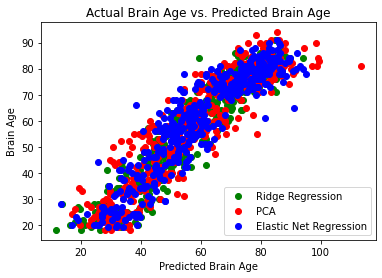

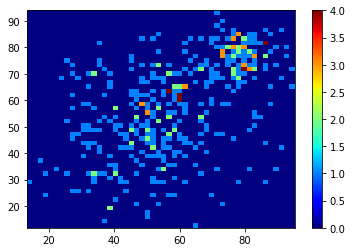

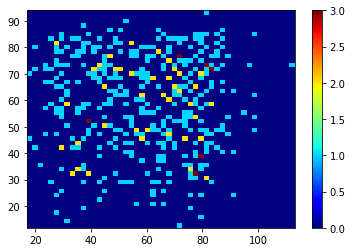

In [21]:
#Plotting Predictions

plt.figure(1)
plt.title('Actual Brain Age vs. Predicted Brain Age')
plt.xlabel('Predicted Brain Age')
plt.ylabel('Brain Age')
plt.scatter(y_pred_2, y_test_2, label = 'Ridge Regression', color = 'green')
plt.scatter(y_pred, y_test, label = 'PCA', color = 'red')
plt.scatter(y_pred_3, y_test_3, label = 'Elastic Net Regression', color = 'blue')
plt.legend(loc = 'lower right')

plt.figure(3)
plt.hist2d(y_pred_3, y_pred_2, (50, 50), cmap=plt.cm.jet)
plt.colorbar()

plt.figure(4)
plt.hist2d(y_pred, y_pred_2, (50,50), cmap=plt.cm.jet)
plt.colorbar()